In [1]:
import pandas as pd
import sys
import os
import sys
import matplotlib.pyplot as plt
import seaborn as sns

import cartopy
import numpy as np
from cartopy.crs import PlateCarree

from cartopy.crs import LambertConformal, Mercator, Orthographic
import shapely
from cartopy.io.shapereader import Reader
from cartopy.feature import ShapelyFeature
import cartopy.io.shapereader as shpreader

#from ..scripts import settings as s
#correct settings import 


import warnings
warnings.filterwarnings('ignore')

In [2]:
train = pd.read_csv("../data/raw/train.csv")

In [4]:
train.sample(5)

,ID,date,device,site_latitude,site_longitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
7356,ID_35SLJWS9K1,2020-02-07,A0WN66FH,0.285751,32.578325,0.782014,24.220486,0.000298,0.929863,0.000277,...,2558.505615,84373.796875,1558.505493,7.572825,0.295463,-97.292702,63.888519,-119.003464,33.733814,48.254583
5261,ID_R13ON0V6E9,2019-11-03,A0WN66FH,0.285751,32.578325,0.788139,23.002083,0.000235,0.607588,0.000143,...,3948.409668,71560.640625,2948.409668,5.340089,0.317454,-97.324799,63.290768,-114.011894,40.366261,43.520417
5883,ID_IYFP1XQ6WL,2020-01-23,AKSLS0FP,0.265007,32.625599,0.435928,24.254924,-0.000105,0.387000,-0.000041,...,11744.539180,25534.281208,10744.539180,5.401216,0.229319,-98.855757,46.608109,-129.155480,32.355958,72.512083
4213,ID_2V14Z9DHEY,2019-10-26,APYZC5J7,0.319970,32.595548,0.928913,21.365972,0.000013,0.804726,0.000011,...,14537.547852,16382.932617,13537.547852,5.046273,0.190411,76.496956,11.668380,-117.917465,27.990902,39.113750
7020,ID_9IR2A7SFMW,2019-11-19,aq_36,0.354825,32.677810,0.854951,22.020139,NaN,NaN,NaN,...,5489.710701,59577.966857,4489.711049,124.631847,0.521608,-97.273247,63.747238,-120.502232,41.734882,58.914433


In [15]:
train.groupby('site_longitude').nunique()

,ID,date,device,site_latitude,humidity,temp_mean,SulphurDioxide_SO2_column_number_density,SulphurDioxide_SO2_column_number_density_amf,SulphurDioxide_SO2_slant_column_number_density,SulphurDioxide_cloud_fraction,...,Cloud_cloud_top_height,Cloud_cloud_base_pressure,Cloud_cloud_base_height,Cloud_cloud_optical_depth,Cloud_surface_albedo,Cloud_sensor_azimuth_angle,Cloud_sensor_zenith_angle,Cloud_solar_azimuth_angle,Cloud_solar_zenith_angle,pm2_5
site_longitude,,,,,,,,,,,,,,,,,,,,,
29.989236,254,254,1,1,254,254,86,86,86,77,...,222,221,221,222,222,222,222,222,222,254
29.989236,199,199,1,1,199,198,63,63,63,57,...,171,171,171,171,171,171,171,171,171,199
32.460320,464,464,1,1,464,463,270,270,270,199,...,312,320,312,320,320,320,319,320,320,464
32.502600,161,161,1,2,161,161,56,56,56,52,...,120,120,120,120,120,120,120,120,120,161
32.506107,239,239,1,1,239,239,106,106,106,99,...,196,196,196,196,196,196,196,196,196,239
32.516000,221,221,1,1,221,221,93,93,93,88,...,180,180,180,180,180,180,180,180,180,221
32.551314,329,329,1,1,292,292,132,132,132,123,...,285,285,285,284,285,284,285,285,285,329
32.553000,372,372,1,1,334,334,140,140,140,131,...,319,319,319,317,319,319,319,319,319,372
32.553714,328,328,1,3,328,326,130,130,130,120,...,277,277,277,276,277,277,277,277,277,328


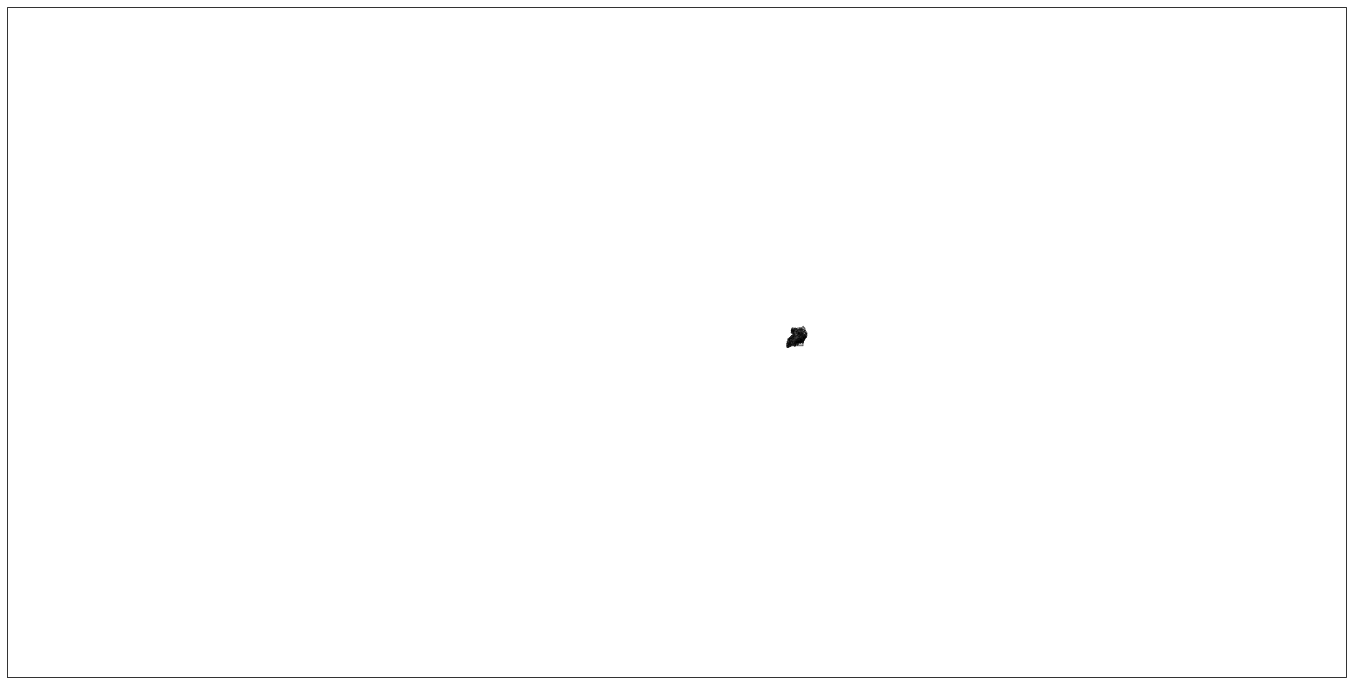

In [21]:
fname = '../data/shapefile/gadm41_UGA_2.shp'
shapes = list(shpreader.Reader(fname).geometries())


def add_map_features():
    ax.coastlines()
    ax.add_feature(cartopy.feature.BORDERS)
    ax.add_feature(cartopy.feature.OCEAN)
    ax.add_feature(cartopy.feature.LAND)
    ax.add_geometries(shapes,PlateCarree(),edgecolor='black',facecolor='white')

plt.figure(figsize=(24, 16))
ax = plt.axes(projection=PlateCarree())
#add_map_features()
ax.add_geometries(shapes, PlateCarree(),
                  edgecolor='black', facecolor='gray', alpha=0.5)


        
plt.show()